In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part2'

In [2]:
customerloan_df = pd.read_csv('./data/ch7/CustomerLoan.csv')

customerloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     21 non-null     int64 
 1   income   21 non-null     int64 
 2   score    21 non-null     int64 
 3   default  20 non-null     object
dtypes: int64(3), object(1)
memory usage: 800.0+ bytes


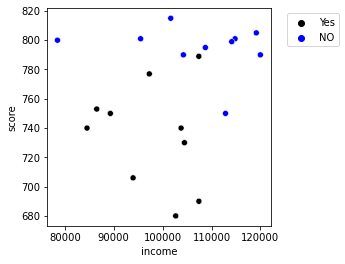

In [3]:
plt.figure(figsize=(4,4))
customerloan_df.sort_values(by='default', ascending=False, inplace=True)
sns.scatterplot(x='income',y='score',hue='default', data = customerloan_df, palette=['k','b'])
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [4]:
customerloan_df['default'].unique()

array(['Yes', 'NO', nan], dtype=object)

In [8]:
customerloan_df['income_normalized'] = (customerloan_df.income - customerloan_df.income.min()) / (customerloan_df.income.max() - customerloan_df.income.min())
customerloan_df['score_normalized'] = (customerloan_df.score - customerloan_df.score.min()) / (customerloan_df.score.max() - customerloan_df.score.min())

customerloan_df

,Name,income,score,default,income_normalized,socre_normalized,score_normalized
10,10,84519,740,Yes,0.145553,0.444444,0.444444
11,11,86504,753,Yes,0.193387,0.540741,0.540741
18,18,107388,789,Yes,0.696653,0.807407,0.807407
17,17,104451,730,Yes,0.625877,0.370370,0.370370
16,16,103760,740,Yes,0.609225,0.444444,0.444444
15,15,102658,680,Yes,0.582669,0.000000,0.000000
14,14,97262,777,Yes,0.452635,0.718519,0.718519
13,13,93941,706,Yes,0.372605,0.192593,0.192593
12,12,89292,750,Yes,0.260573,0.518519,0.518519
19,19,107400,690,Yes,0.696942,0.074074,0.074074


### KNN

### Index와 Column 바꾸기  => .T

In [22]:
from sklearn.neighbors import KNeighborsClassifier

predictors =['income_normalized','score_normalized']
target = 'default'
xs = customerloan_df[predictors].drop(index=[20]) ### independent attributes
y = customerloan_df[target].drop(index=[20]) ### a dependent attribute

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xs,y)

newapplicant = customerloan_df.iloc[20][['income_normalized','score_normalized']]
newapplicant_df = pd.DataFrame(newapplicant).T
newapplicant_df

predict_y = knn.predict(newapplicant_df)
print(predict_y)

['NO']


### Decision Tree

### Decision Tree에서는 Normalize를 하지 않는다.

In [23]:
from sklearn.tree import DecisionTreeClassifier

predictors = ['income', 'score'] ### Nomalizing을 하지 않는다.
target = 'default'

xs = customerloan_df[predictors].drop(index=[20])
y = customerloan_df[target].drop(index=[20])
classtree = DecisionTreeClassifier()
classtree.fit(xs,y)
predict_y = classtree.predict(newapplicant_df)
print(predict_y)

['Yes']


### Tree Image 불러오기


[Text(200.88000000000002, 181.2, 'score <= 789.5\nsamples = 20\nvalue = [10, 10]\nclass = Yes'),
 Text(133.92000000000002, 108.72, 'income <= 110122.5\nsamples = 11\nvalue = [1, 10]\nclass = NO'),
 Text(66.96000000000001, 36.23999999999998, 'samples = 10\nvalue = [0, 10]\nclass = NO'),
 Text(200.88000000000002, 36.23999999999998, 'samples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(267.84000000000003, 108.72, 'samples = 9\nvalue = [9, 0]\nclass = Yes')]

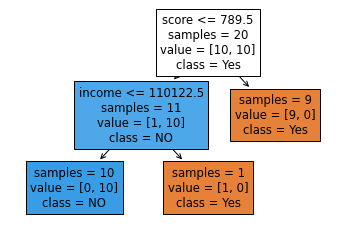

In [24]:
from sklearn.tree import plot_tree 

plot_tree(classtree, feature_names=predictors, class_names=y.unique(), filled =True, impurity=False)

Questions
1. .fillna로 NaN 값 플롯에 별표로 표시하기
2. Decision Tree로 주사위 합 Tree를 만들 수 있나? 

4.7692133


In [ ]:
10,000,000,000